## Examen Aprendizaje Profundo

#### Alumno: Lucas Rivela
#### Cohorte: 5
#### Profesores: Ezequiel Esposito y Marcos Maillot

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import torch
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader

#### Punto 1

Para el modelo propuesto lo que voy a hacer es tener una loss function que exprese el error cuadrático medio (MSE) y luego voy a calcular la derivada de esta salida respecto de cada parámetro de la ecuación, utilizando la regla de la cadena

##### Modelo

$\hat{y} = x^3w_{1} + x^2w_{2} + xw_{1} + b$

##### Loss function

$L = (y_{i} - \hat{y_{i}})^2$

$\frac{\partial L}{\partial \hat{y}} = -2 . (y - \hat{y})$

##### Derivada respecto de $w_{1}$

$\frac{\partial L}{\partial {w_{1}}} = \frac{\partial L}{\partial \hat{y}} . \frac{\partial \hat{y}}{\partial w_{1}} = -2 . (y - \hat{y}) . (x^3 + x) $

##### Derivada respecto de $w_{2}$

$\frac{\partial L}{\partial {w_{2}}} = \frac{\partial L}{\partial \hat{y}} . \frac{\partial \hat{y}}{\partial w_{2}} = -2 . (y - \hat{y}) . (x^2) $

##### Derivada respecto de $b$

$\frac{\partial L}{\partial b} = \frac{\partial L}{\partial \hat{y}} . \frac{\partial \hat{y}}{\partial b} = -2 . (y - \hat{y}) $

In [56]:
# Hiperparametros
n_epochs = 1000
alfa = 0.001
batches = 10
epsilon = 0.1

In [57]:
# Inicializo pesos de forma aleatoria
w1 = random.uniform(0, 1)
w2 = random.uniform(0, 1)
b = random.uniform(0, 1)
print(w1, w2, b)

0.514398494861493 0.9668374007716195 0.43577147061524024


In [8]:
# Cargo el dataset
dataset = np.genfromtxt('dataset_1.csv', delimiter=',')
print("Shape ", dataset.shape)
print("NaNs ", np.isnan(np.sum(dataset)))

Shape  (10000, 2)
NaNs  False


In [9]:
def calculate_y_hat(X, w1, w2, b):
    """
    Función que hace el forward del modelo

    Parameters:
        X: Input batch del modelo para predecir el resultado
        w1: Peso para w1
        w2: Peso para w2
        b: Peso para b
    Returns:
        y_hat: (np.array) Predicciones del batch
    """
    y_hat = w1*(X**3) + w2*(X**2) + w1*(X) + [b] * len(X)
    return y_hat

In [10]:
def calculate_loss_w1(err, X_batch):
    """
    Función que calcula la derivada de la loss function respecto del peso w1

    Parameters:
        err: Error del batch
        X_batch: Input batch del modelo

    Returns:
        loss_w1: Derivada de la loss function respecto de w1 para el batch
    """
    loss = -2 * err * ( (X_batch**3) + (X_batch) )
    return np.sum(loss) / len(X_batch)

In [11]:
def calculate_loss_w2(err, X_batch):
    """
    Función que calcula la derivada de la loss function respecto del peso w2

    Parameters:
        err: Error del batch
        X_batch: Input batch del modelo

    Returns:
        loss_w2: Derivada de la loss function respecto de w2 para el batch
    """
    loss = -2 * err * (X_batch**2)
    return np.sum(loss) / len(X_batch)

In [12]:
def calculate_loss_b(err, X_batch):
    """
    Función que calcula la derivada de la loss function respecto del peso b

    Parameters:
        err: Error del batch
        X_batch: Input batch del modelo

    Returns:
        loss_b: Derivada de la loss function respecto de b para el batch
    """
    loss = -2 * err
    return np.sum(loss) / len(X_batch)

In [30]:
def create_mini_batches(dataset, batch_size):
    """
    Función que genera batches a partir de un dataset y un tamaño de batch

    Parameters:
        dataset: Dataset
        batch_size: tamaño del batch

    Returns:
        mini_batches: Lista de batches
    """
    mini_batches = []
    for i in range(0, dataset.shape[0], batch_size):
        mini_batch = np.array(dataset[i: i + batch_size,])
        mini_batches.append(mini_batch)
    
    return mini_batches

In [58]:
#batch_list = create_mini_batches(dataset[:8000,], batches)
batch_list = create_mini_batches(dataset, batches)
print("Training", len(batch_list))
#validation_batch = create_mini_batches(dataset[8001:,], batches)
#print("Validation", len(validation_batch))

Training 1000


In [59]:
ecm = []
val_ecm = []
for e in range(n_epochs):
    change_w1 = 0
    change_w2 = 0
    change_b = 0
    mse_batch = 0
    mse_val = 0

    for batch in batch_list:
        y_hat = calculate_y_hat(batch[:,0], w1, w2, b)
        err = (batch[:,1] - y_hat)

        loss_w1 = calculate_loss_w1(err, batch[:,0])
        loss_w2 = calculate_loss_w2(err, batch[:,0])
        loss_b = calculate_loss_b(err, batch[:,0])

        new_change_w1 = ( alfa * loss_w1 + epsilon * change_w1 )
        new_change_w2 = ( alfa * loss_w2 + epsilon * change_w2 )
        new_change_b = ( alfa * loss_b + epsilon * change_b )

        w1 = w1 - new_change_w1
        w2 = w2 - new_change_w2
        b = b - new_change_b

        change_w1 = new_change_w1
        change_w2 = new_change_w2
        change_b = new_change_b

        mse_batch += np.sum(err ** 2) / batch.shape[0]
    ecm.append(mse_batch)

    #for batch in validation_batch:
    #    y_hat = calculate_y_hat(batch[:,0], w1, w2, b)
    #    err = (batch[:,1] - y_hat)
    #    mse_val += np.sum(err ** 2) / batch.shape[0]
    #val_ecm.append(mse_val)

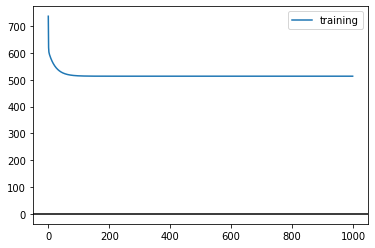

In [61]:
plt.plot(range(n_epochs), ecm, label='training')
plt.axhline(y=0, color='k')
plt.legend()

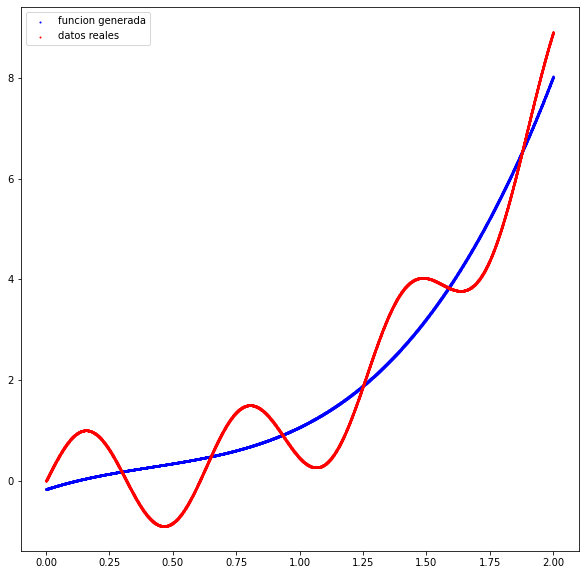

In [306]:
y_hat = calculate_y_hat(dataset[:,0], w1, w2, b)
plt.figure(figsize=(10,10))
plt.scatter(dataset[:,0], y_hat, label='funcion generada', c='blue', s=1)
plt.scatter(dataset[:,0], dataset[:,1], label='datos reales', c='red', s=1)
plt.legend()

De los gráficos anteriores se puede ver que el modelo está haciendo underfitting. Esto es así porque el MSE queda estancado y no logra seguir descendiendo. Además cuando vemos el scatterplot del $y$ real vs el $\hat{y}$; la función no tiene la flexibilidad necesaria para adaptarse a la curva.

#### Punto 2

In [81]:
class MyDataset(Dataset):

    def __init__(self, X, y):
      super().__init__()
      self.X = X
      self.y = y

    def __len__(self):
      return self.X.shape[0]

    def __getitem__(self, idx):
      return self.X[idx], self.y[idx]

In [264]:
train = MyDataset(np.expand_dims(dataset[:,0], axis=0).T, np.expand_dims(dataset[:,1], axis=0).T)
#validation = MyDataset(np.expand_dims(dataset[8000:,0], axis=0).T, np.expand_dims(dataset[8000:,1], axis=0).T)

In [265]:
print("Train", len(train))
#print("Validation", len(validation))

Train 10000


In [266]:
train_dataloader = DataLoader(train, batch_size=64, shuffle=False)
#valid_dataloader = DataLoader(validation, batch_size=64, shuffle=False)

In [267]:
class NNet(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(in_features=1, out_features=20, bias=True)
        self.relu_1 = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(in_features=20, out_features=20, bias=True)
        self.relu_2 = torch.nn.ReLU()
        self.linear_3 = torch.nn.Linear(in_features=20, out_features=20, bias=True)
        self.relu_3 = torch.nn.ReLU()
        self.linear_4 = torch.nn.Linear(in_features=20, out_features=20, bias=True)
        self.relu_4 = torch.nn.ReLU()
        self.linear_5 = torch.nn.Linear(in_features=20, out_features=20, bias=True)
        self.relu_5 = torch.nn.ReLU()
        self.linear_6 = torch.nn.Linear(in_features=20, out_features=20, bias=True)
        self.relu_6 = torch.nn.ReLU()
        self.linear_7 = torch.nn.Linear(in_features=20, out_features=20, bias=True)
        self.relu_7 = torch.nn.ReLU()
        self.linear_8 = torch.nn.Linear(in_features=20, out_features=20, bias=True)
        self.relu_8 = torch.nn.ReLU()
        self.linear_9 = torch.nn.Linear(in_features=20, out_features=20, bias=True)
        self.relu_9 = torch.nn.ReLU()
        self.linear_10 = torch.nn.Linear(in_features=20, out_features=20, bias=True)
        self.relu_10 = torch.nn.ReLU()
        self.output = torch.nn.Linear(in_features=20, out_features=1, bias=True)

    def forward(self, x): # x.shape -> 64x1
        x = self.linear_1(x) # 64x20
        x = self.relu_1(x) # 64x20
        x = self.linear_2(x) # 64x20
        x = self.relu_2(x) # 64x20
        x = self.linear_3(x) # 64x20
        x = self.relu_3(x) # 64x20
        x = self.linear_4(x) # 64x20
        x = self.relu_4(x) # 64x20
        x = self.linear_5(x) # 64x20
        x = self.relu_5(x) # 64x20
        x = self.linear_6(x) # 64x20
        x = self.relu_6(x) # 64x20
        x = self.linear_7(x) # 64x20
        x = self.relu_7(x) # 64x20
        x = self.linear_8(x) # 64x20
        x = self.relu_8(x) # 64x20
        x = self.linear_9(x) # 64x20
        x = self.relu_9(x) # 64x20
        x = self.linear_10(x) # 64x20
        x = self.relu_10(x) # 64x20
        x = self.output(x) # 64x1
        return x

In [302]:
nnet = NNet()
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.001)
loss_function = torch.nn.MSELoss()

In [119]:
device = ""
if torch.cuda.is_available():
  device = "cuda:0"
else:
  device = "cpu"

In [120]:
RANGE=100

In [303]:
nnet.to(device)

loss_list = []
validation_loss_list = []
for epoch in range(RANGE):
    running_loss = 0
    running_y_score = []
    running_validation_loss = 0
    running_validation_y_score = []
    y_label = []
    
    #### TRAINING ####
    for i, data in enumerate(train_dataloader):
        X_batch, y_batch = data #  Datos del batch
        X_batch = X_batch.to(device).float()
        Y_batch = y_batch.to(device).float()

        # forward
        optimizer.zero_grad()
        y_batch_score = nnet(X_batch)

        # backprop
        loss = loss_function(y_batch_score, Y_batch)  # Calcula el loss
        loss.backward()  # Hacer los gradientes del loss

        # actualizacion de parametros
        optimizer.step()

        # metrics
        running_loss += loss.item()
        running_y_score += list(y_batch_score.detach().cpu().numpy())

    # Metrics
    loss_list.append(running_loss)
    print(f"Epoch {epoch} | Training loss: {running_loss}")

    ###### VALIDATION ####
    #nnet.eval()
    #with torch.no_grad():
    #    for i, data in enumerate(valid_dataloader): 
    #        # Datos del batch
    #        X_validation_batch, y_validation_batch = data
    #        X_validation_batch = X_validation_batch.to(device).float()
    #        Y_validation_batch = y_validation_batch.to(device).float()
    #
    #        # Forward
    #        y_validation_batch_score = nnet(X_validation_batch)
    #
    #        validation_loss = loss_function(y_validation_batch_score, Y_validation_batch) #  Calcula el loss
    #
    #        # Acumular validation loss
    #        running_validation_loss += validation_loss.item()
    #
    #        # Acumular metrics y_score and y
    #        running_validation_y_score += list(y_validation_batch_score.detach().cpu().numpy())
    #
    ## Calcular las metricas
    #validation_loss_list.append(running_validation_loss)
    #print(f"Epoch {epoch} | Validation loss: {running_validation_loss}")

Epoch 0 | Training loss: 826.8471979498863
Epoch 1 | Training loss: 91.55461031198502
Epoch 2 | Training loss: 80.23423650860786
Epoch 3 | Training loss: 76.78788569569588
Epoch 4 | Training loss: 65.82765436172485
Epoch 5 | Training loss: 46.76093591749668
Epoch 6 | Training loss: 43.37208506464958
Epoch 7 | Training loss: 41.97687063366175
Epoch 8 | Training loss: 39.94534566998482
Epoch 9 | Training loss: 38.06306739151478
Epoch 10 | Training loss: 35.92683035880327
Epoch 11 | Training loss: 30.0580199547112
Epoch 12 | Training loss: 11.64140777476132
Epoch 13 | Training loss: 0.9802045291289687
Epoch 14 | Training loss: 0.16737772143096663
Epoch 15 | Training loss: 0.10269188793608919
Epoch 16 | Training loss: 0.08321504821651615
Epoch 17 | Training loss: 0.06910685170441866
Epoch 18 | Training loss: 0.0596879591466859
Epoch 19 | Training loss: 0.0524889978041756
Epoch 20 | Training loss: 0.05195330006245058
Epoch 21 | Training loss: 0.04968427868152503
Epoch 22 | Training loss: 0.

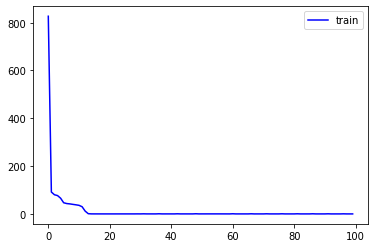

In [304]:
# Plot train loss and valid loss vs epochs
fig, ax1 = plt.subplots(1,1)
x = range(0, len(loss_list))
ax1.plot(x, loss_list, color='b', label='train')
#ax1.plot(x, validation_loss_list, color='r', label='valid')
ax1.legend()

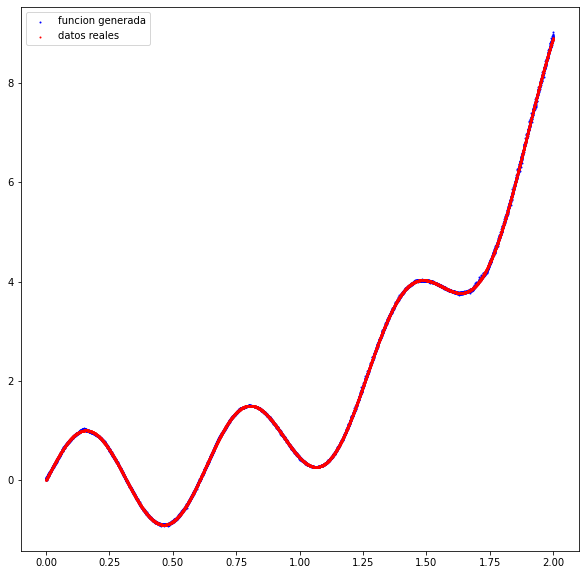

In [305]:
plt.figure(figsize=(10,10))
plt.scatter(dataset[:,0], running_y_score, label='funcion generada', c='blue', s=1)
plt.scatter(dataset[:,0], dataset[:,1], label='datos reales', c='red', s=1)
plt.legend()

De los gráficos anteriores podemos ver que la Red está haciendo overfitting, ya que se está aprendiendo de memoria la función dentro del intervalo 0,2.

Agrego Regularización L2

In [296]:
nnet = NNet()
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.001, weight_decay=25e-3)

In [297]:
nnet.to(device)

loss_list = []
validation_loss_list = []
for epoch in range(RANGE):
    running_loss = 0
    running_y_score = []
    running_validation_loss = 0
    running_validation_y_score = []
    y_label = []
    
    #### TRAINING ####
    for i, data in enumerate(train_dataloader):
        X_batch, y_batch = data #  Datos del batch
        X_batch = X_batch.to(device).float()
        Y_batch = y_batch.to(device).float()

        # forward
        optimizer.zero_grad()
        y_batch_score = nnet(X_batch)

        # backprop
        loss = loss_function(y_batch_score, Y_batch)  # Calcula el loss
        loss.backward()  # Hacer los gradientes del loss

        # actualizacion de parametros
        optimizer.step()

        # metrics
        running_loss += loss.item()
        running_y_score += list(y_batch_score.detach().cpu().numpy())

    # Metrics
    loss_list.append(running_loss)
    print(f"Epoch {epoch} | Training loss: {running_loss}")

Epoch 0 | Training loss: 935.2953335642815
Epoch 1 | Training loss: 85.27918720245361
Epoch 2 | Training loss: 81.75405350327492
Epoch 3 | Training loss: 81.61565592885017
Epoch 4 | Training loss: 81.58612886071205
Epoch 5 | Training loss: 81.56845504045486
Epoch 6 | Training loss: 81.55111089348793
Epoch 7 | Training loss: 81.54748266935349
Epoch 8 | Training loss: 81.53663411736488
Epoch 9 | Training loss: 81.52129945158958
Epoch 10 | Training loss: 81.52173271775246
Epoch 11 | Training loss: 81.47778964042664
Epoch 12 | Training loss: 81.45994195342064
Epoch 13 | Training loss: 81.44738608598709
Epoch 14 | Training loss: 81.42913526296616
Epoch 15 | Training loss: 81.4188024699688
Epoch 16 | Training loss: 81.3962234556675
Epoch 17 | Training loss: 81.38541132211685
Epoch 18 | Training loss: 81.37401133775711
Epoch 19 | Training loss: 81.36018109321594
Epoch 20 | Training loss: 81.35624796152115
Epoch 21 | Training loss: 81.34126818180084
Epoch 22 | Training loss: 81.32580387592316


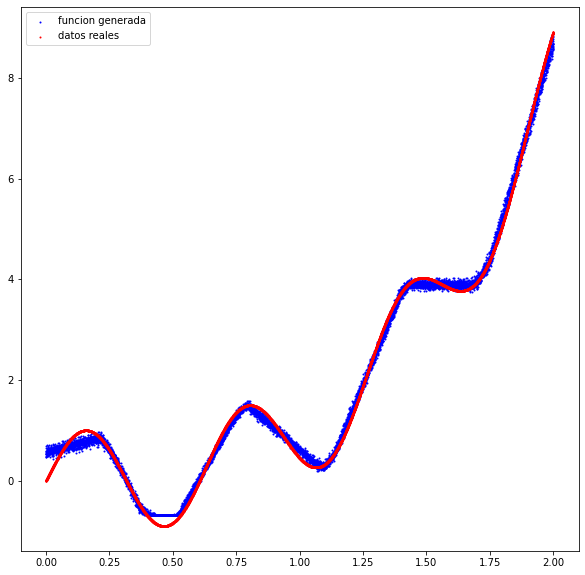

In [299]:
plt.figure(figsize=(10,10))
plt.scatter(dataset[:,0], running_y_score, label='funcion generada', c='blue', s=1)
plt.scatter(dataset[:,0], dataset[:,1], label='datos reales', c='red', s=1)
plt.legend()

#### Punto 3

EDA

In [73]:
df = pd.read_csv('./dataset_2.csv')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [75]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [76]:
df.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [77]:
df.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [78]:
df.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [14]:
df.Stay_In_Current_City_Years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [15]:
df.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

Aca vemos que:
- A la columna Gender se le puede hacer Binary Encoding
- A la columna City_Category se le puede hacer OHE
- A la columna Age se le puede hacer OHE
- A la columna Stay_In_Current_City_Years se le puede hacer OHE

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Aca vemos que hay 2 columnas con muchos nulls, Product_Category_3 tiene aprox. 70% y Product_Category_2 tiene aprox. 30%. Ambas columnas son candidatas a ser ignoradas para el modelo.

In [79]:
df = df.dropna()
df.shape

(166821, 12)

In [80]:
df["Gender"] = df.Gender.apply(lambda x: 1 if x == 'M' else 0)

In [81]:
category_dummies = pd.get_dummies(df["City_Category"], prefix="City_Category")
df = pd.concat([df, category_dummies], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166821 non-null  int64  
 1   Product_ID                  166821 non-null  object 
 2   Gender                      166821 non-null  int64  
 3   Age                         166821 non-null  object 
 4   Occupation                  166821 non-null  int64  
 5   City_Category               166821 non-null  object 
 6   Stay_In_Current_City_Years  166821 non-null  object 
 7   Marital_Status              166821 non-null  int64  
 8   Product_Category_1          166821 non-null  int64  
 9   Product_Category_2          166821 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    166821 non-null  int64  
 12  City_Category_A             166821 non-null  uint8  
 13  City_Category_

In [82]:
age_dummies = pd.get_dummies(df["Age"], prefix="Age")
df = pd.concat([df, age_dummies], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166821 non-null  int64  
 1   Product_ID                  166821 non-null  object 
 2   Gender                      166821 non-null  int64  
 3   Age                         166821 non-null  object 
 4   Occupation                  166821 non-null  int64  
 5   City_Category               166821 non-null  object 
 6   Stay_In_Current_City_Years  166821 non-null  object 
 7   Marital_Status              166821 non-null  int64  
 8   Product_Category_1          166821 non-null  int64  
 9   Product_Category_2          166821 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    166821 non-null  int64  
 12  City_Category_A             166821 non-null  uint8  
 13  City_Category_

In [83]:
city_dummies = pd.get_dummies(df["Stay_In_Current_City_Years"], prefix="City_Years")
df = pd.concat([df, city_dummies], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166821 non-null  int64  
 1   Product_ID                  166821 non-null  object 
 2   Gender                      166821 non-null  int64  
 3   Age                         166821 non-null  object 
 4   Occupation                  166821 non-null  int64  
 5   City_Category               166821 non-null  object 
 6   Stay_In_Current_City_Years  166821 non-null  object 
 7   Marital_Status              166821 non-null  int64  
 8   Product_Category_1          166821 non-null  int64  
 9   Product_Category_2          166821 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    166821 non-null  int64  
 12  City_Category_A             166821 non-null  uint8  
 13  City_Category_

Ahora lo que voy a hacer es un Binary Encoding de la columna Purchase

In [84]:
df["Target"] = df.Purchase.apply(lambda x: 1 if x >= 9000 else 0)

In [85]:
y = df["Target"]
X = df.drop(["Target", "Purchase", "City_Category", "Age", "Stay_In_Current_City_Years", "User_ID", "Product_ID"], axis=1)

In [86]:
y.head()

1     1
6     1
13    1
14    0
16    1
Name: Target, dtype: int64

In [87]:
X.head()

,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_Category_A,City_Category_B,City_Category_C,Age_0-17,...,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Years_0,City_Years_1,City_Years_2,City_Years_3,City_Years_4+
1,0,10,0,1,6.0,14.0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,1,7,1,1,8.0,17.0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
13,1,20,1,1,2.0,5.0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
14,0,9,0,5,8.0,14.0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
16,0,9,0,2,3.0,4.0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [88]:
## Normalizacion
X_norm = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
X_norm.describe()

,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_Category_A,City_Category_B,City_Category_C,Age_0-17,...,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Years_0,City_Years_1,City_Years_2,City_Years_3,City_Years_4+
count,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,...,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000
mean,0.774645,0.408944,0.402839,0.124483,0.349777,0.644550,0.248884,0.415074,0.336043,0.029211,...,0.401280,0.199525,0.080170,0.066934,0.035157,0.134210,0.349398,0.188915,0.175446,0.152031
std,0.417817,0.324376,0.490470,0.183855,0.321449,0.275023,0.432367,0.492736,0.472355,0.168398,...,0.490159,0.399645,0.271557,0.249908,0.184178,0.340879,0.476781,0.391442,0.380349,0.359052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.100000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.350000,0.000000,0.000000,0.285714,0.733333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.700000,1.000000,0.214286,0.571429,0.866667,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
n = X_norm.shape[0]
idx = np.random.permutation(np.arange(0, n))
train_idx = idx[0:int(0.8*n)]
valid_idx = idx[int(0.8*n):]
print(len(train_idx))
print(len(valid_idx))

133456
33365


In [90]:
y_ = y.to_numpy()
X_norm_ = X_norm.to_numpy()

In [91]:
X_train = X_norm_[train_idx,:]
y_train = y_[train_idx]

X_valid = X_norm_[valid_idx,:]
y_valid = y_[valid_idx]

In [92]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(133456, 21)
(133456,)
(33365, 21)
(33365,)


##### NNet sin embedding

In [93]:
class MyDataset(Dataset):

    def __init__(self, X, y):
      super().__init__()
      self.X = X
      self.y = y

    def __len__(self):
      return self.X.shape[0]

    def __getitem__(self, idx):
      return self.X[idx], self.y[idx]

In [114]:
train = MyDataset(X_train, y_train)
validation = MyDataset(X_valid, y_valid)

In [115]:
train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
valid_dataloader = DataLoader(validation, batch_size=64, shuffle=True)

In [124]:
class NNet(torch.nn.Module):

  def __init__(self):
    super().__init__()
    self.linear_1 = torch.nn.Linear(in_features=21, out_features=100, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features=100, out_features=100, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.linear_3 = torch.nn.Linear(in_features=100, out_features=100, bias=True)
    self.relu_3 = torch.nn.ReLU()
    self.linear_4 = torch.nn.Linear(in_features=100, out_features=100, bias=True)
    self.relu_4 = torch.nn.ReLU()
    self.linear_5 = torch.nn.Linear(in_features=100, out_features=100, bias=True)
    self.relu_5 = torch.nn.ReLU()
    self.linear_6 = torch.nn.Linear(in_features=100, out_features=100, bias=True)
    self.relu_6 = torch.nn.ReLU()  
    self.output = torch.nn.Linear(in_features=100, out_features=1, bias=True)

  
  def forward(self, x): # x.shape -> 64x21
    x = self.linear_1(x) # 64x100
    x = self.relu_1(x) # 64x100
    x = self.linear_2(x) # 64x100
    x = self.relu_2(x) # 64x100
    x = self.linear_3(x)  # 64x100
    x = self.relu_3(x)  # 64x100
    x = self.linear_4(x)  #64x100
    x = self.relu_4(x)  #64x100
    x = self.linear_5(x)  #64x100
    x = self.relu_5(x)  #64x100
    x = self.linear_6(x)  #64x100
    x = self.relu_6(x)  #64x100
    x = self.output(x)  #64x1
    return x

In [125]:
nnet = NNet()
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.001)
loss_function = torch.nn.BCEWithLogitsLoss(reduction="sum")

device = ""
if torch.cuda.is_available():
  device = "cuda:0"
else:
  device = "cpu"

In [37]:
EPOCHS = 100

In [126]:
nnet.to(device)

loss_list = []
train_auc = []
validation_loss_list = []
validation_auc = []
for epoch in range(EPOCHS):

    running_loss = 0
    running_y_score = []
    running_y_label = []
    running_validation_loss = 0
    running_validation_y_score = []
    running_validation_y_label = []

    for i, data in enumerate(train_dataloader):
        X_batch, y_batch = data # datos del batch
        X_batch = X_batch.to(device).float()
        Y_batch = y_batch.to(device).float()

        # forward
        optimizer.zero_grad()
        y_batch_score = nnet(X_batch).reshape(-1)
        y_batch_hat = torch.sigmoid(y_batch_score).reshape(-1)

        # backprop
        loss = loss_function(y_batch_score, Y_batch) # calcula el loss
        loss.backward() # hacer los gradientes del loss

        # actualizacion de parametros
        optimizer.step()

        # metrics
        running_loss += loss.item()
        running_y_score += list(y_batch_score.detach().cpu().numpy())
        running_y_label += list(Y_batch.detach().cpu().numpy())

    # metrics
    loss_list.append(running_loss)
    fpt, tpr, _ = metrics.roc_curve(running_y_label, running_y_score)
    auc = metrics.auc(fpt, tpr)
    train_auc.append(auc)
    print(f"Epoch {epoch} | Training loss: {running_loss} | AUC: {auc}")
    
    #### VALIDATION ####
    nnet.eval()
    with torch.no_grad():
        for i, data in enumerate(valid_dataloader): 
            # Datos del batch
            X_validation_batch, y_validation_batch = data
            X_validation_batch = X_validation_batch.to(device).float()
            Y_validation_batch = y_validation_batch.to(device).float()

            # Forward
            y_validation_batch_score = nnet(X_validation_batch).reshape(-1)
            y_validation_batch_hat = torch.sigmoid(y_validation_batch_score).reshape(-1)

            validation_loss = loss_function(y_validation_batch_score, Y_validation_batch) #  Calcula el loss

            # Acumular validation loss
            running_validation_loss += validation_loss.item()

            # Acumular metrics y_score and y
            running_validation_y_score += list(y_validation_batch_score.detach().cpu().numpy())
            running_validation_y_label += list(Y_validation_batch.detach().cpu().numpy())
      
        # Calcular las metricas (AUC)
        validation_loss_list.append(running_validation_loss)
        fpt_v, tpr_v, _ = metrics.roc_curve(running_validation_y_label, running_validation_y_score)
        auc_v = metrics.auc(fpt_v, tpr_v)
        validation_auc.append(auc_v)
        print(f"Epoch {epoch} | Validation loss: {running_validation_loss} | AUC: {auc_v}")




Epoch 0 | Training loss: 61353.883014678955 | AUC: 0.7974233411140155
Epoch 0 | Validation loss: 13952.076298713684 | AUC: 0.8237823819778397
Epoch 1 | Training loss: 56734.96445608139 | AUC: 0.817912962407336
Epoch 1 | Validation loss: 13981.295906066895 | AUC: 0.8241385934052241
Epoch 2 | Training loss: 56464.55871772766 | AUC: 0.8206062070152967
Epoch 2 | Validation loss: 13983.694622516632 | AUC: 0.8252066249640986
Epoch 3 | Training loss: 56104.786504507065 | AUC: 0.8238691661011719
Epoch 3 | Validation loss: 13841.449453353882 | AUC: 0.8304930222056335
Epoch 4 | Training loss: 56470.88701105118 | AUC: 0.8239856764152111
Epoch 4 | Validation loss: 13877.189232349396 | AUC: 0.828184239474864
Epoch 5 | Training loss: 55258.15309262276 | AUC: 0.8285782010103262
Epoch 5 | Validation loss: 13917.130075454712 | AUC: 0.8275551756131575
Epoch 6 | Training loss: 54118.104818344116 | AUC: 0.8346904805275767
Epoch 6 | Validation loss: 13534.702702999115 | AUC: 0.836470847441063
Epoch 7 | Tra

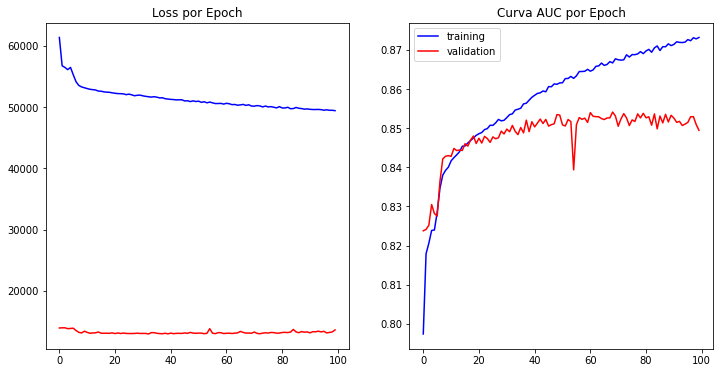

In [127]:
fig = plt.figure(figsize=(25, 6))

iax0 = fig.add_subplot(141)
iax0.set_title('Loss por Epoch')
x = range(0, len(loss_list))
iax0.plot(x, loss_list, label='training', c='blue')
iax0.plot(x, validation_loss_list, label='validation', c='red')

iax1 = fig.add_subplot(142)
iax1.set_title('Curva AUC por Epoch')
x = range(0, len(train_auc))
iax1.plot(x, train_auc, label='training', c='blue')
iax1.plot(x, validation_auc, label='validation', c='red')

plt.legend()

##### NNet con embedding

In [131]:
user_id = df["User_ID"]
product_id = df["Product_ID"]

In [132]:
unique_user = np.unique(user_id)
index_user = np.arange(0, len(unique_user))
user_id_to_index = {key: value for key, value in zip(unique_user, index_user)}

unique_product = np.unique(product_id)
index_product = np.arange(0, len(product_id))
product_id_to_index = {key: value for key,value in zip(unique_product, index_product)}

users_idx = np.array([user_id_to_index[user] for user in user_id])
products_idx = np.array([product_id_to_index[product] for product in product_id])

In [133]:
print(max(users_idx))
print(min(users_idx))
print(len(users_idx))

print(max(products_idx))
print(min(products_idx))
print(len(products_idx))

5869
0
166821
527
0
166821


In [134]:
class CustomDatasetWithEmb(Dataset):

  def __init__(self, X, users_idx, products_idx, y):
    super().__init__()
    self.X = X
    self.users_idx = users_idx
    self.products_idx = products_idx
    self.y = y
  
  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, idx):
      return self.X[idx], self.users_idx[idx], self.products_idx[idx], self.y[idx]

In [135]:
users_index_train = users_idx[train_idx]
users_index_val = users_idx[valid_idx]

products_index_train = products_idx[train_idx]
products_index_val = products_idx[valid_idx]

In [136]:
train = CustomDatasetWithEmb(X_train, users_index_train, products_index_train, y_train)
valid = CustomDatasetWithEmb(X_valid, users_index_val, products_index_val, y_valid)

train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
valid_dataloader = DataLoader(valid, batch_size=64, shuffle=True)

In [138]:
class NNetWithEmbeddings(torch.nn.Module):

  def __init__(self, number_of_users, d1, number_of_products, d2):
    super().__init__()
    self.users_embedding = torch.nn.Embedding(num_embeddings=number_of_users, embedding_dim=d1)
    self.products_embedding = torch.nn.Embedding(num_embeddings=number_of_products, embedding_dim=d2)
    self.linear_1 = torch.nn.Linear(in_features=(21+d1+d2), out_features=100, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features=100, out_features=100, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.linear_3 = torch.nn.Linear(in_features=100, out_features=100, bias=True)
    self.relu_3 = torch.nn.ReLU()
    self.linear_3 = torch.nn.Linear(in_features=100, out_features=100, bias=True)
    self.relu_3 = torch.nn.ReLU()
    self.linear_4 = torch.nn.Linear(in_features=100, out_features=100, bias=True)
    self.relu_4 = torch.nn.ReLU()
    self.linear_5 = torch.nn.Linear(in_features=100, out_features=100, bias=True)
    self.relu_5 = torch.nn.ReLU()
    self.linear_6 = torch.nn.Linear(in_features=100, out_features=100, bias=True)
    self.relu_6 = torch.nn.ReLU()
    self.output = torch.nn.Linear(in_features=100, out_features=1, bias=True)

  
  def forward(self, x, user_idx, product_idx):
    user_emb = self.users_embedding(user_idx)  # (64, d1)
    prod_emb = self.products_embedding(product_idx)  # (64, d2)

    final_input = torch.cat([x, user_emb, prod_emb], dim=1)  # (64, 21+d1+d2)

    x = self.linear_1(final_input) 
    x = self.relu_1(x) 
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.linear_3(x)
    x = self.relu_3(x)
    x = self.linear_4(x)
    x = self.relu_4(x)
    x = self.linear_5(x)
    x = self.relu_5(x)
    x = self.linear_6(x)
    x = self.relu_6(x)
    x = self.output(x)
    return x

In [139]:
nnet2 = NNetWithEmbeddings(number_of_users=len(users_idx), d1=8, number_of_products=len(products_idx), d2=8)
optimizer = torch.optim.Adam(nnet2.parameters(), lr=0.001)
loss_function = torch.nn.BCEWithLogitsLoss(reduction="sum")
EPOCHS = 100
print(nnet2)

NNetWithEmbeddings(
  (users_embedding): Embedding(166821, 8)
  (products_embedding): Embedding(166821, 8)
  (linear_1): Linear(in_features=37, out_features=100, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=100, out_features=100, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=100, out_features=100, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=100, out_features=100, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=100, out_features=100, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=100, out_features=100, bias=True)
  (relu_6): ReLU()
  (output): Linear(in_features=100, out_features=1, bias=True)
)


In [140]:
nnet2.to(device)

loss_list = []
train_auc = []
validation_loss_list = []
validation_auc = []
for epoch in range(EPOCHS):

    running_loss = 0
    running_y_score = []
    running_y_label = []
    running_validation_loss = 0
    running_validation_y_score = []
    running_validation_y_label = []

    #### TRAINING ####
    for i, data in enumerate(train_dataloader):

        # datos del batch
        X_batch, user_idx_batch, product_idx_batch, y_batch = data 
        X_batch = X_batch.to(device).float()
        user_idx_batch = user_idx_batch.to(device)
        product_idx_batch = product_idx_batch.to(device)
        Y_batch = y_batch.to(device).float()

        # forward
        optimizer.zero_grad()
        y_batch_score = nnet2(X_batch, user_idx_batch, product_idx_batch).reshape(-1)
        y_batch_hat = torch.sigmoid(y_batch_score).reshape(-1)

        # backpropagation
        loss = loss_function(y_batch_score, Y_batch) # calcula el loss
        loss.backward() # hacer los gradientes del loss

        # actualización de parametros
        optimizer.step() 

        running_loss += loss.item()
        running_y_score += list(y_batch_score.detach().cpu().numpy())  
        running_y_label += list(Y_batch.detach().cpu().numpy()) 

    # Metrics
    loss_list.append(running_loss)
    fpt, tpr, _ = metrics.roc_curve(running_y_label, running_y_score)
    auc = metrics.auc(fpt, tpr)
    train_auc.append(auc)
    print(f"Epoch {epoch} | Training loss: {running_loss} | AUC: {auc}")

    #### VALIDATION ####
    nnet2.eval()
    with torch.no_grad():

      for i, data in enumerate(valid_dataloader): 
        # Datos del batch
        X_validation_batch, user_idx_validation_batch, product_idx_validation_batch, y_validation_batch = data
        X_validation_batch = X_validation_batch.to(device).float()
        user_idx_validation_batch = user_idx_validation_batch.to(device)
        product_idx_validation_batch = product_idx_validation_batch.to(device)
        Y_validation_batch = y_validation_batch.to(device).float()

        # Forward
        y_validation_batch_score = nnet2(X_validation_batch, user_idx_validation_batch, product_idx_validation_batch).reshape(-1)
        y_validation_batch_hat = torch.sigmoid(y_validation_batch_score).reshape(-1)

        validation_loss = loss_function(y_validation_batch_score, Y_validation_batch) #  Calcula el loss

        # Acumular validation loss
        running_validation_loss += validation_loss.item()

        # Acumular metrics y_score and y
        running_validation_y_score += list(y_validation_batch_score.detach().cpu().numpy())
        running_validation_y_label += list(Y_validation_batch.detach().cpu().numpy())

      
      # Calcular las metricas (AUC)
      validation_loss_list.append(running_validation_loss)
      fpt_v, tpr_v, _ = metrics.roc_curve(running_validation_y_label, running_validation_y_score)
      auc_v = metrics.auc(fpt_v, tpr_v)
      validation_auc.append(auc_v)
      print(f"Epoch {epoch} | Validation loss: {running_validation_loss} | AUC: {auc_v}")

Epoch 0 | Training loss: 58704.687381744385 | AUC: 0.8321003260852347
Epoch 0 | Validation loss: 12201.900480270386 | AUC: 0.8862105308630639
Epoch 1 | Training loss: 48326.67576289177 | AUC: 0.8865669382164378
Epoch 1 | Validation loss: 11883.983531951904 | AUC: 0.8907439277914506
Epoch 2 | Training loss: 46737.65338754654 | AUC: 0.8955729674863562
Epoch 2 | Validation loss: 11662.674139022827 | AUC: 0.896739592454119
Epoch 3 | Training loss: 45306.41498851776 | AUC: 0.9033569761488355
Epoch 3 | Validation loss: 11440.956851005554 | AUC: 0.9028231719887501
Epoch 4 | Training loss: 43717.099872112274 | AUC: 0.9116075080868329
Epoch 4 | Validation loss: 11266.832830429077 | AUC: 0.9056599797053223
Epoch 5 | Training loss: 42262.996347904205 | AUC: 0.9187614891061056
Epoch 5 | Validation loss: 11250.43816947937 | AUC: 0.9078124089267399
Epoch 6 | Training loss: 41081.79572057724 | AUC: 0.9240666811733301
Epoch 6 | Validation loss: 11339.335618972778 | AUC: 0.9088788214054344
Epoch 7 | Tr

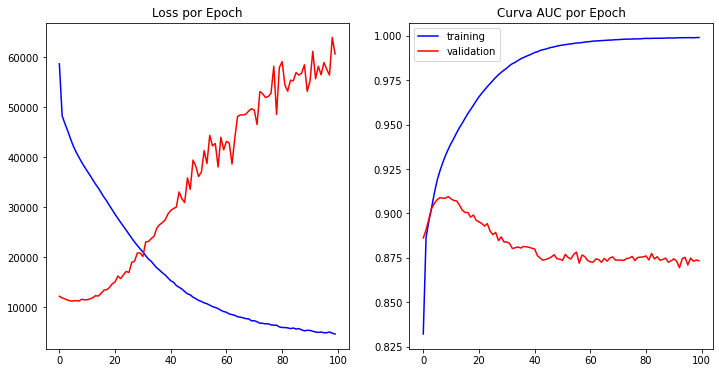

In [141]:
fig = plt.figure(figsize=(25, 6))

iax0 = fig.add_subplot(141)
iax0.set_title('Loss por Epoch')
x = range(0, len(loss_list))
iax0.plot(x, loss_list, label='training', c='blue')
iax0.plot(x, validation_loss_list, label='validation', c='red')

iax1 = fig.add_subplot(142)
iax1.set_title('Curva AUC por Epoch')
x = range(0, len(train_auc))
iax1.plot(x, train_auc, label='training', c='blue')
iax1.plot(x, validation_auc, label='validation', c='red')

plt.legend()

##### Comparacion

Por un lado se implementó una red neuronal fully connected de 7 capas (6 con componente alineal y la última solo con la parte lineal) con cada capa intermedia con 100 neuronas y por otro lado se implementó una red neuronal de igual arquitectura pero agregando 2 embeddings, uno para los usuarios y otro para los productos.

Para la red neuronal que no tiene embeddings lo que se ve es que la red está haciendo underfitting, no llega a reducir el loss en el dataset de training ni en el de validation, por lo que quizás, con una arquitectura un poco más compleja se puedan llegar a obtener mejores resultados.

Para la red neuronal que tiene los 2 embeddings, lo que se ve es un claro overfitting. La red se aprende de memoria el dataset de training pero el error en validation crece a medida que pasan las epochs.


Nota:
Para este ejercicio se intentó trabajar el dataset inicial de distintas maneras, por ejemplo en lugar de remover las filas con null, remover las columnas Product_Category_2 y Product_Category_3 pero los resultados fueron similares o peores.

Por otro lado también se intentó trabajar con redes más pequeñas (2 o 3 capas) pero los efectos fueron similares.

#### Punto 4

Función

$y = a \log({b}) + b c^2$

Derivadas Analiticas

$\frac{\partial y}{\partial a} = log(b)$

$\frac{\partial y}{\partial b} = \frac{a}{b} + c^2$

$\frac{\partial y}{\partial c} = 2bc$

Derivadas usando Límite



Derivadas usando grafo de cómputo y regla de la cadena

Derivada respecto de a

$\frac{\partial y}{\partial a} = \lim\limits_{h \to 0}{\frac{(a+h)\log(b)+bc^2 -a\log(b) - bc^2}{h}}$ 

$= \lim\limits_{h \to 0}{\frac{(a+h)\log(b)+\cancel{bc^2} -a\log(b) - \cancel{bc^2}}{h}}$

$= \lim\limits_{h \to 0}{\frac{(a+h)\log(b) -a\log(b)}{h}}$

$= \lim\limits_{h \to 0}{\frac{(\cancel{a}+h\cancel{-a})\log(b)}{h}}$

$= \lim\limits_{h \to 0}{\frac{(h)\log(b)}{h}}$

$= \lim\limits_{h \to 0} { \log(b)}$

$= \log(b)$

Derivada respecto de b

$\frac{\partial y}{\partial b} = \lim\limits_{h \to 0}{\frac{(a)\log(b+h)+(b+h)c^2 -a\log(b) - bc^2}{h}} = \lim\limits_{h \to 0}{\frac{(a)\log(b+h)-a\log(b) + (b+h)c^2 - bc^2}{h}} $ 

$= \lim\limits_{h \to 0}{\frac{(a)\log(b+h)-a\log(b) + (\cancel{b}+ h \cancel{-b})c^2}{h}}$

$= \lim\limits_{h \to 0}{\frac{(a)\log(b+h)-a\log(b) + (h)c^2}{h}}$

$= \lim\limits_{h \to 0}{\frac{(a)\log(b+h)-a\log(b)}{h} + c^2}$

$= \lim\limits_{h \to 0}{\frac{a}{h} \log(\frac{b+h}{b}) + c^2}$

$= \lim\limits_{h \to 0}{\frac{a}{h} \log(1+\frac{h}{b}) + c^2}$

Planteo $h=vb$ entonces $v=\frac{h}{b}$. Se puede afirmar que cuando h tiende a 0 tambien lo hace v

$= \lim\limits_{v \to 0}{\frac{a}{vb} \log(1+v) + c^2}$

$= \lim\limits_{v \to 0}{\frac{a}{vb} \log(1+v) + c^2}$

$= \lim\limits_{v \to 0}{\frac{a}{b}\frac{\log(1+v)}{v} + c^2}$

Tenemos una indeterminacion del tipo $\frac{0}{0}$ por lo que tenemos que aplicar la regla de L'Hopital. Nos resulta:

$= \lim\limits_{v \to 0}{\frac{a}{b}\frac{\frac{1}{1+v}}{1} + c^2}$

$= \frac{a}{b} + c^2$

Derivada respecto de c

$\frac{\partial y}{\partial c} = \lim\limits_{h \to 0}{\frac{a\log(b)+b(c+h)^2 -a\log(b) - bc^2}{h}}$ 

$= \lim\limits_{h \to 0}{\frac{\cancel{a\log(b)}+b(c+h)^2 \cancel{-a\log(b)} - bc^2}{h}}$

$= \lim\limits_{h \to 0}{\frac{b(c+h)^2 - bc^2}{h}}$

$= \lim\limits_{h \to 0}{\frac{b(c^2 +2ch + h^2) - bc^2}{h}}$

$= \lim\limits_{h \to 0}{\frac{b(c^2 +2ch + h^2 - c^2)}{h}}$

$= \lim\limits_{h \to 0}{\frac{b(\cancel{c^2} +2ch + h^2 - \cancel{c^2})}{h}}$

$= \lim\limits_{h \to 0}{\frac{2bch}{h} \frac{bh^2}{h}}$

$= \lim\limits_{h \to 0}{\frac{2bc\cancel{h}}{\cancel{h}} \frac{\cancel{bh^2}}{\cancel{h}}}$

$= 2bc$